## Instructions

Please make a copy and rename it with your name (ex: Proj6_Ilmi_Yoon). All grading points should be explored in the notebook but some can be done in a separate pdf file. 

*Graded questions will be listed with "Q:" followed by the corresponding points.* 

You will be submitting **a pdf** file containing **the url of your own proj6.**


---

**Hypothesis testing**
===

**Outline**

At the end of this week, you will be a pro at:
- **hypothesis testing** 
  *  is there something interesting/meaningful going on in my data?
    - one-sample t-test
    - two-sample t-test
- **correcting for multiple testing**
  *  doing thousands of hypothesis tests at a time will increase your likelihood of incorrect conclusions
  *  you'll learn how to account for that
- **false discovery rates**
  *  you could be a perfectionist ("even one wrong conclusion is the worst"), aka family-wise error rate (FWER) 
  *  or become a pragmatic ("of my significant discoveries, i expect x% of them to be false positives."), aka false discovery rate (FDR)
- **permutation tests**
  *  if your assumptions about your data are wrong, you may over/underestimate your confidence in your conclusions
  *  assume as little as possible about the data with a permutation test




**Examples**

In class, we will talk about 3 examples:
- confidence intervals
  - how much time do Americans spend on average per day on Netflix? 

- one-sample t-test 
  - do Americans spend more time on average per day on Netflix compared to before the pandemic?

- two-sample t-test 
  - does exercise affect baseline blood pressure? 
  


**Your project**
- RNA sequencing: which genes differentiate the different immune cells in your blood?
  - two-sample t-test
  - multiple testing correction





**How do you make the best of this week?**
- start seeing all statistics reported around you, and think of how they relate to what we have learned. 
- do rigorous statistics in your work from now on

**LET'S BEGIN!**

===============================================================

In [11]:
#import python packages

import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
rng = np.random.RandomState(1234) #this will ensure the reproducibility of the notebook

**EXAMPLE I:** 
===

How much time do subscribers spend on average each day on Netflix?
--

Example discussed in class (Lecture 1). The data we are working with are simulated, but the mean time spent on Netflix is inspired by https://www.pcmag.com/news/us-netflix-subscribers-watch-32-hours-and-use-96-gb-of-data-per-day (average of 3.2 hours for subscribers).




Population mean 2.94
- Sample mean 3.07
Population standard deviation 1.12
- Biased sample standard deviation 0.82
- Unbiased sample standard deviation 1.01
(array([0., 2., 1., 2., 3.]), array([0, 1, 2, 3, 4, 5]), <BarContainer object of 5 artists>)


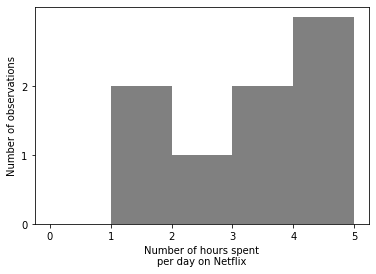

In [38]:
#Summarizing data
#================
population=np.array([1,1.8,2,3.2,3.3,4,4,4.2])
our_sample=np.array([2,3.2,4])

#means
population_mean=np.mean(population)
print('Population mean', population_mean.round(2))

sample_mean=np.mean(our_sample)
print('- Sample mean', sample_mean.round(2))

#standard deviations
population_sd=np.std(population)
print('Population standard deviation',population_sd.round(2))

#biased sample sd

# sum( (sample - sample_mean)^2 )
mean_squared = np.power(our_sample - sample_mean, 2).sum()
# for 1D Arrays it will only return one argument (length) 
length_of_array, = our_sample.shape

biased_sample_sd=np.sqrt(mean_squared / length_of_array)
print('- Biased sample standard deviation', biased_sample_sd.round(2))

# print("shape: ", our_sample.shape)

#unbiased sample sd
unbiased_sample_sd = np.sqrt(mean_squared / (length_of_array - 1))
print('- Unbiased sample standard deviation', unbiased_sample_sd.round(2))

test = plt.hist(population, range(0, 6), color='grey')

print(test)

plt.yticks([0,1,2])
plt.xlabel('Number of hours spent\nper day on Netflix')
plt.ylabel('Number of observations')

plt.show()

In [14]:
#larger example

MEAN_NETFLIX=3.2
SD_NETFLIX=1
population=rng.normal(loc=MEAN_NETFLIX, 
                            scale=SD_NETFLIX, 
                            size=1000)
population[population<0]=0
our_sample = population[0:100]

#means
population_mean = np.mean(population)
print('Population mean', population_mean.round(2))

sample_mean = np.mean(our_sample)
print('- Sample mean', sample_mean.round(2))

#standard deviations
population_sd = np.std(population)
print('Population standard deviation', population_sd.round(2))

#biased sample sd
biased_sample_sd = np.sqrt((np.power(our_sample-sample_mean,2).sum())/our_sample.shape[0])
print('- Biased sample standard deviation', biased_sample_sd.round(2))

#unbiased sample sd
unbiased_sample_sd=np.sqrt((np.power(our_sample-sample_mean,2).sum()) / (our_sample.shape[0]-1))
print('- Unbiased sample standard deviation', unbiased_sample_sd.round(2))

Population mean 3.22
- Sample mean 3.24
Population standard deviation 0.97
- Biased sample standard deviation 0.98
- Unbiased sample standard deviation 0.99


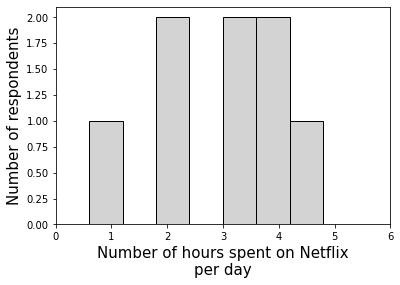

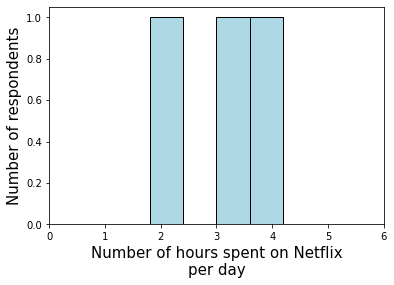

C:\Users\freshskates\.conda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


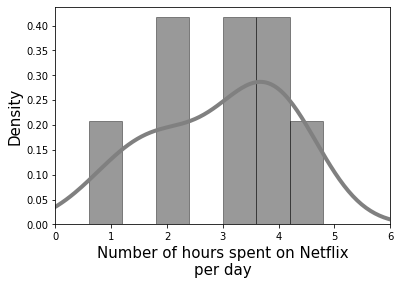

C:\Users\freshskates\.conda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


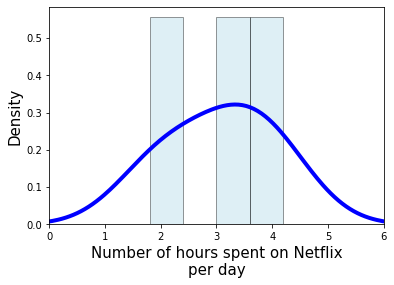

C:\Users\freshskates\.conda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\freshskates\.conda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


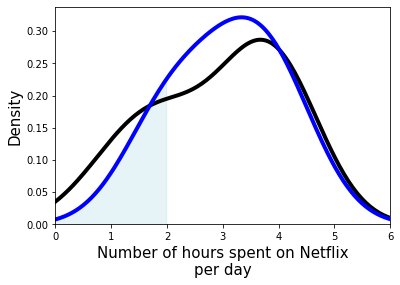

In [42]:
#representing sets of datapoints
#===============================

#histograms
plt.hist(population, [x * 0.6 for x in range(10)], color='lightgray', edgecolor='black')
plt.xlabel('Number of hours spent on Netflix\nper day', fontsize = 15)
plt.ylabel('Number of respondents', fontsize=15)

plt.xlim(0,6)
plt.show()

plt.hist(our_sample, [x * 0.6 for x in range(10)], color='lightblue', edgecolor='black')

plt.xlabel('Number of hours spent on Netflix\nper day', fontsize=15)
plt.ylabel('Number of respondents', fontsize=15)

plt.xlim(0,6)
plt.show()

#densities
sns.distplot(population, hist=True, kde=True, 
             bins = [x * 0.6 for x in range(10)], color = 'grey', 
             hist_kws = {'edgecolor': 'black','color':'black'},
             kde_kws = {'linewidth': 4})

plt.xlabel('Number of hours spent on Netflix\nper day', fontsize=15)
plt.ylabel('Density', fontsize=15)

plt.xlim(0,6)
plt.show()

sns.distplot(our_sample, hist=True, kde=True, 
             bins=[x*0.6 for x in range(10)], color = 'blue', 
             hist_kws={'edgecolor':'black','color':'lightblue'},
             kde_kws={'linewidth': 4})

plt.xlabel('Number of hours spent on Netflix\nper day',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.xlim(0,6)
plt.show()

#put both data in the same plot
fig,plots=plt.subplots(1)

sns.distplot(population, hist=False, kde=True, 
             bins=[x*0.6 for x in range(10)], color = 'black', 
             hist_kws={'edgecolor':'black','color':'black'},
             kde_kws={'linewidth': 4},ax=plots)

plots.set_xlim(0,6)

sns.distplot(our_sample, hist=False, kde=True, 
             bins=[x*0.6 for x in range(10)], color = 'blue', 
             hist_kws={'edgecolor':'black','color':'black'},
             kde_kws={'linewidth': 4},ax=plots)
             
plots.set_xlabel('Number of hours spent on Netflix\nper day',fontsize=15)

plots.set_ylabel('Density',fontsize=15)
x = plots.lines[-1].get_xdata()
y = plots.lines[-1].get_ydata()

plots.fill_between(x, 0, y, where = x < 2, color = 'lightblue', alpha=0.3)

plt.xlim(0,6)

plt.show()



C:\Users\freshskates\.conda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


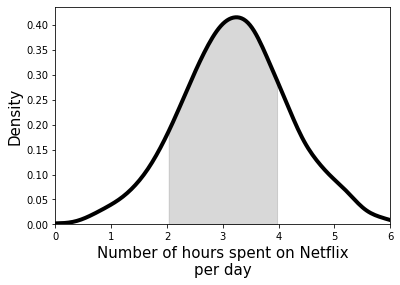

0.695

In [16]:

#put both data in the same plot
fig,plots=plt.subplots(1)
sns.distplot(population, hist=False, kde=True, 
             bins=[x*0.6 for x in range(10)], color = 'black', 
             hist_kws={'edgecolor':'black','color':'black'},
             kde_kws={'linewidth': 4},ax=plots)
plots.set_xlim(0,6)
x = plots.lines[-1].get_xdata()
y = plots.lines[-1].get_ydata()
plots.fill_between(x, 0, y, where=(x < 4) & (x>2), color='gray', alpha=0.3)
plt.xlim(0,6)
plots.set_xlabel('Number of hours spent on Netflix\nper day',fontsize=15)
plots.set_ylabel('Density',fontsize=15)
plt.show()

np.multiply((population<=4),(population>=2)).sum()/population.shape[0]

Mean of the means 3.216576508130295
SEM (SD of the means) 0.30921136197021937


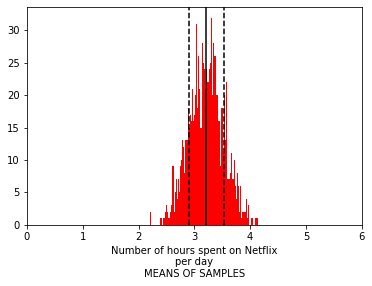

within 1 means SD: 0.669
within 1 means SD: 0.96


In [17]:
#brute force confidence interval
N_POPULATION=10000
N_SAMPLE=1000
population=np.random.normal(loc=MEAN_NETFLIX, 
                            scale=SD_NETFLIX, 
                            size=N_POPULATION)
population[population<0]=0
sample_means=[]
for i in range(N_SAMPLE):
  sample_i=np.random.choice(population,10)
  mean_i=np.mean(sample_i)
  sample_means.append(mean_i)
sample_means=np.array(sample_means)

#sd of the mean
means_mean=np.mean(sample_means)
means_sd=np.std(sample_means)
print('Mean of the means',means_mean)
print('SEM (SD of the means)',means_sd)


plt.hist(sample_means,100,color='red')
plt.xlabel('Number of hours spent on Netflix\nper day\nMEANS OF SAMPLES')
plt.xlim(0,6)
plt.axvline(x=means_mean,color='black')
plt.axvline(x=means_mean-means_sd,color='black',linestyle='--')
plt.axvline(x=means_mean+means_sd,color='black',linestyle='--')
plt.show()

#compute what fraction of points are within 1 means_sd from means_mean
within_1sd=0
within_2sd=0
for i in range(sample_means.shape[0]):
  m=sample_means[i]
  if m>=(means_mean-means_sd) and m<=(means_mean+means_sd):
    within_1sd+=1
  if m>=(means_mean-2*means_sd) and m<=(means_mean+2*means_sd):
    within_2sd+=1
print('within 1 means SD:',within_1sd/sample_means.shape[0])
print('within 1 means SD:',within_2sd/sample_means.shape[0])

In [18]:
from scipy import stats
print('SEM (SD of the means), empirically calculated',means_sd.round(2))
print('SEM computed in python',stats.sem(sample_i).round(2))


SEM (SD of the means), empirically calculated 0.31
SEM computed in python 0.29


In [19]:
#one sample t test in python
from scipy.stats import ttest_1samp

MEAN_NETFLIX=3.2
SD_NETFLIX=1
population=rng.normal(loc=MEAN_NETFLIX, 
                            scale=SD_NETFLIX, 
                            size=1000)
population[population<0]=0
our_sample=population[0:10]
print(our_sample.round(2))
print(our_sample.mean())
print(our_sample.std())

TEST_VALUE=1.5

t, pvalue = ttest_1samp(our_sample, popmean=TEST_VALUE)
print('t', t.round(2))  
print('p-value', pvalue.round(6))

[1.62 1.58 3.25 1.52 4.6  2.36 4.01 3.15 3.73 2.39]
2.8206757978474783
1.0381608736065147
t 3.82
p-value 0.004113


         mean    ci_low   ci_high
0    2.457770  1.973384  2.942155
1    2.482410  1.913993  3.050827
2    2.560495  1.927943  3.193047
3    2.567117  1.985376  3.148859
4    2.599810  2.155022  3.044598
..        ...       ...       ...
195  3.810371  3.111876  4.508865
196  3.837725  3.347243  4.328208
197  3.915426  3.402254  4.428598
198  3.931329  3.469197  4.393461
199  4.033870  3.497809  4.569931

[200 rows x 3 columns]


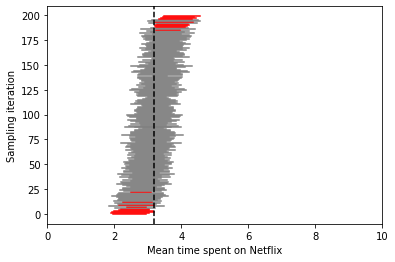

         mean    ci_low   ci_high
0    2.250001  1.390901  3.109102
1    2.459938  1.602863  3.317013
2    2.487529  1.677358  3.297701
3    2.526563  2.021850  3.031277
4    2.546538  1.725664  3.367411
..        ...       ...       ...
195  3.907851  2.902437  4.913265
196  3.934154  2.934220  4.934089
197  4.030994  3.366019  4.695969
198  4.128074  3.376734  4.879413
199  4.196744  3.331889  5.061599

[200 rows x 3 columns]


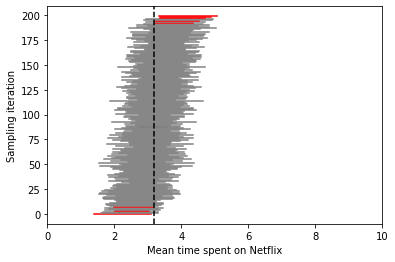

         mean    ci_low   ci_high
0    2.262010 -1.113583  5.637602
1    2.455576  0.142359  4.768792
2    2.562498 -1.156415  6.281410
3    2.584501 -1.562799  6.731800
4    2.621453 -1.145509  6.388415
..        ...       ...       ...
195  3.872447  0.031590  7.713305
196  3.877383  1.793633  5.961132
197  3.879779  1.304686  6.454873
198  3.897073  0.934497  6.859650
199  3.976533 -0.350849  8.303915

[200 rows x 3 columns]


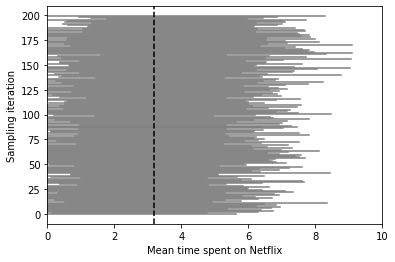

In [20]:
#confidence intervals
#=====================
#take 100 samples
#compute their confidence intervals
#plot them

import scipy.stats as st

N_SAMPLE=200
for CONFIDENCE in [0.9,0.98,0.999999]:
  population=rng.normal(loc=MEAN_NETFLIX, 
                              scale=SD_NETFLIX, 
                              size=N_POPULATION)
  population[population<0]=0
  sample_means=[]
  ci_lows=[]
  ci_highs=[]
  for i in range(N_SAMPLE):
    sample_i=np.random.choice(population,10)
    mean_i=np.mean(sample_i)
    ci=st.t.interval(alpha=CONFIDENCE, 
                  df=sample_i.shape[0]-1, loc=mean_i, scale=st.sem(sample_i))
    ci_lows.append(ci[0])
    ci_highs.append(ci[1])
    sample_means.append(mean_i)

  data=pd.DataFrame({'mean':sample_means,'ci_low':ci_lows,'ci_high':ci_highs})
  data=data.sort_values(by='mean')
  data.index=range(N_SAMPLE)
  print(data)

  for i in range(N_SAMPLE):
    color='gray'
    if MEAN_NETFLIX>data['ci_high'][i] or MEAN_NETFLIX<data['ci_low'][i]:
      color='red'
    plt.plot((data['ci_low'][i],data['ci_high'][i]),(i,i),color=color)
  #plt.scatter(data['mean'],range(N_SAMPLE),color='black')
  plt.axvline(x=MEAN_NETFLIX,color='black',linestyle='--')
  plt.xlabel('Mean time spent on Netflix')
  plt.ylabel('Sampling iteration')
  plt.xlim(0,10)
  plt.show()

         mean    ci_low   ci_high
0    2.819508  2.664207  2.974808
1    2.925016  2.776059  3.073974
2    2.960247  2.780444  3.140049
3    2.986124  2.810441  3.161806
4    2.990046  2.831570  3.148523
..        ...       ...       ...
195  3.404762  3.236951  3.572573
196  3.415268  3.229943  3.600592
197  3.416775  3.234809  3.598741
198  3.436507  3.283117  3.589896
199  3.442770  3.261891  3.623648

[200 rows x 3 columns]


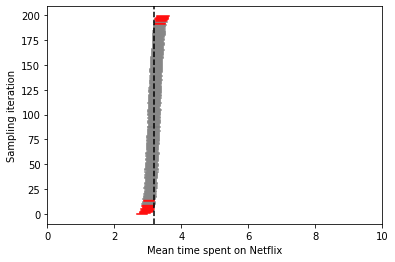

         mean    ci_low   ci_high
0    2.975067  2.739773  3.210361
1    2.983827  2.746718  3.220935
2    2.985635  2.756080  3.215190
3    3.010519  2.776286  3.244753
4    3.021307  2.778111  3.264503
..        ...       ...       ...
195  3.437374  3.192640  3.682107
196  3.444043  3.207830  3.680256
197  3.446771  3.216788  3.676754
198  3.462174  3.197558  3.726790
199  3.529572  3.296587  3.762556

[200 rows x 3 columns]


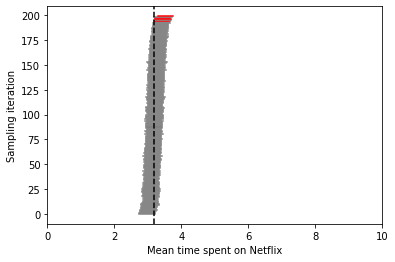

         mean    ci_low   ci_high
0    2.968086  2.443012  3.493160
1    2.979677  2.432221  3.527134
2    2.985917  2.448039  3.523794
3    3.018178  2.473128  3.563228
4    3.018935  2.488689  3.549180
..        ...       ...       ...
195  3.409796  2.873975  3.945617
196  3.410882  2.965617  3.856148
197  3.413724  2.896741  3.930708
198  3.417871  2.930955  3.904787
199  3.489899  2.987151  3.992647

[200 rows x 3 columns]


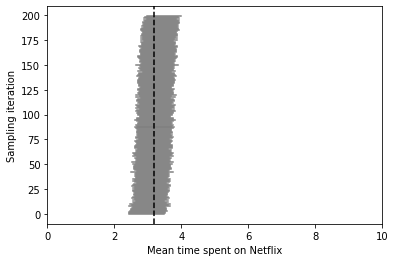

In [21]:
#confidence intervals
#=====================
#take 100 samples
#compute their confidence intervals
#plot them

import scipy.stats as st

N_SAMPLE=200
for CONFIDENCE in [0.9,0.98,0.999999]:
  population=rng.normal(loc=MEAN_NETFLIX, 
                              scale=SD_NETFLIX, 
                              size=N_POPULATION)
  population[population<0]=0
  sample_means=[]
  ci_lows=[]
  ci_highs=[]
  for i in range(N_SAMPLE):
    sample_i=np.random.choice(population,100)
    mean_i=np.mean(sample_i)
    ci=st.t.interval(alpha=CONFIDENCE, 
                  df=sample_i.shape[0]-1, loc=mean_i, scale=st.sem(sample_i))
    ci_lows.append(ci[0])
    ci_highs.append(ci[1])
    sample_means.append(mean_i)

  data=pd.DataFrame({'mean':sample_means,'ci_low':ci_lows,'ci_high':ci_highs})
  data=data.sort_values(by='mean')
  data.index=range(N_SAMPLE)
  print(data)

  for i in range(N_SAMPLE):
    color='gray'
    if MEAN_NETFLIX>data['ci_high'][i] or MEAN_NETFLIX<data['ci_low'][i]:
      color='red'
    plt.plot((data['ci_low'][i],data['ci_high'][i]),(i,i),color=color)
  #plt.scatter(data['mean'],range(N_SAMPLE),color='black')
  plt.axvline(x=MEAN_NETFLIX,color='black',linestyle='--')
  plt.xlabel('Mean time spent on Netflix')
  plt.ylabel('Sampling iteration')
  plt.xlim(0,10)
  plt.show()

**EXAMPLE II:** 
===

Is exercise associated with lower baseline blood pressure?
--

We will simulate data with control mean 120 mmHg, treatment mean 116 mmHg and population sd 5 for both conditions.

In [22]:
#simulate dataset
#=====================

def sample_condition_values(condition_mean,
                           condition_var,
                       condition_N,
                       condition=''):
    
  condition_values=np.random.normal(loc = condition_mean, 
                                    scale=condition_var,
                                    size = condition_N)

  data_condition_here=pd.DataFrame({'BP':condition_values,
                   'condition':condition})
  return(data_condition_here)

#=========================================================================
N_per_condition=10
ctrl_mean=120
test_mean=116 
v=5

np.random.seed(1)

data_ctrl=sample_condition_values(condition_mean=ctrl_mean,
                       condition_N=N_per_condition,
                       condition_var=v,
                       condition='couch')

data_test=sample_condition_values(condition_mean=test_mean,
                       condition_N=N_per_condition,
                       condition_var=v,
                       condition='exercise')

data=pd.concat([data_ctrl,data_test],axis=0)
print(data)

           BP condition
0  128.121727     couch
1  116.941218     couch
2  117.359141     couch
3  114.635157     couch
4  124.327038     couch
5  108.492307     couch
6  128.724059     couch
7  116.193965     couch
8  121.595195     couch
9  118.753148     couch
0  123.310540  exercise
1  105.699296  exercise
2  114.387914  exercise
3  114.079728  exercise
4  121.668847  exercise
5  110.500544  exercise
6  115.137859  exercise
7  111.610708  exercise
8  116.211069  exercise
9  118.914076  exercise


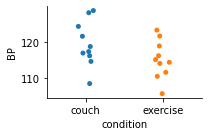

In [23]:
#visualize data
#=====================

sns.catplot(x='condition',y='BP',data=data,height=2,aspect=1.5)
plt.ylabel('BP')
plt.show()

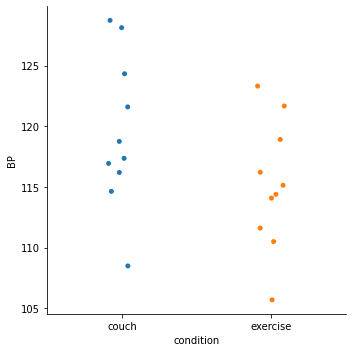

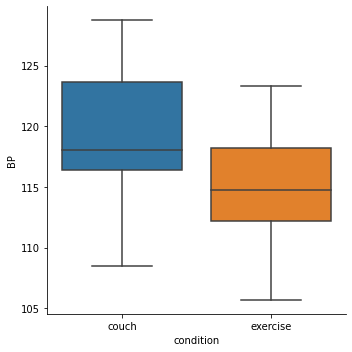

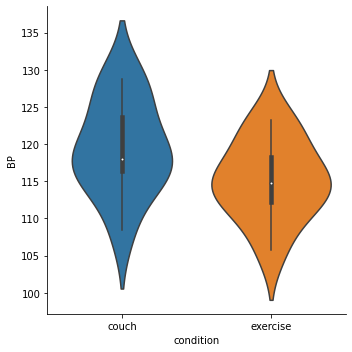

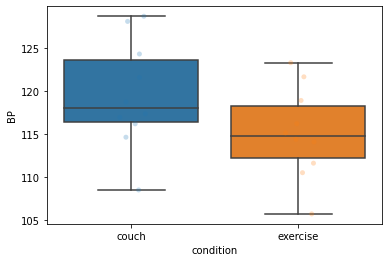

In [24]:
sns.catplot(data=data,x='condition',y='BP',
            jitter=1,
            )
plt.show()

sns.catplot(data=data,x='condition',y='BP',kind='box',)
plt.show()

sns.catplot(data=data,x='condition',y='BP',kind='violin',)
plt.show()

fig,plots=plt.subplots(1)
sns.boxplot(data=data,x='condition',y='BP',
            ax=plots,
            )
sns.stripplot(data=data,x='condition',y='BP',
            jitter=1,
            ax=plots,alpha=0.25,
            )

plt.show()

In our hypothesis test, we ask if these two groups differ significantly from each other. It's a bit hard to say just from looking at the plot. 

This is where statistics comes in. It's time to:

*3. Think about how much the data surprise you, given your null model*

We'll convert this step to some math, as follows:

**Step 1. summarize the difference between the groups with a number.**

This is called a **test statistic** 

"How to define the test statistic?" you say?

The world is your oyster. You are free to choose anything you wish. 

(Later, we'll see that some choices come with nice math, which is why they are typically used. But a test statistic could be anything)

To demonstrate this intuition, let's come up with a very basic test statistic. For example, let's compute the difference between the BP in the 2 groups.



In [25]:
mean_ctrl=np.mean(data[data['condition']=='couch']['BP'])
mean_test=np.mean(data[data['condition']=='exercise']['BP'])

test_stat=mean_test-mean_ctrl
print('test statistic =',test_stat)

test statistic = -4.362237456546268


What is this number telling us? Is the BP significantly different between the 2 conditions? It's impossible to say looking at only this number.

We have to ask ourselves, well, what did you expect?

This takes us to the next step.



**ii) think about what the test statistic would be if in reality there were no difference between the 2 groups. It will be a distribution, not just a single number, because you would expect to see some variation in the test statistic whenever you do an experiment, due to sampling noise, and due to variation in the population.**

Here is where the wasteful part comes in. You go and repeat the measurement on 1000 different couch grouos. Then, for each of these, you compute the same test statistic = the difference between the mean in that sample and your original couch group.


In [26]:
np.random.seed(1)
data_exp2=sample_condition_cells(condition_mean=ctrl_mean,
                       condition_num_cells=N_per_condition,
                       condition_var=v,
                       condition='control_0')
for i in range(1,1001):
  data_exp2=pd.concat([data_exp2,sample_condition_cells(condition_mean=ctrl_mean,
                       condition_num_cells=N_per_condition,
                       condition_var=v,
                       condition='control_'+str(i))])

print(data_exp2)

NameError: name 'sample_condition_cells' is not defined

                      BP
condition               
control_0     119.514296
control_1     119.152058
control_10    120.201086
control_100   118.518008
control_1000  119.698545


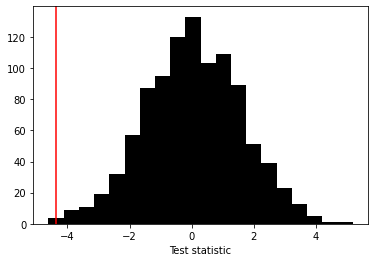

In [ ]:
#now, let's plot the distribution of the test statistic under the null hypothesis

#get mean of each control
exp2_means=data_exp2.groupby('condition').mean()
print(exp2_means.head())

null_test_stats=exp2_means-ctrl_mean

plt.hist(np.array(null_test_stats).flatten(),20,color='black')
plt.xlabel('Test statistic')
plt.axvline(x=test_stat,color='red')


In [ ]:
null_test_stats

,BP
condition,
control_0,-0.485704
control_1,-0.847942
control_10,0.201086
control_100,-1.481992
control_1000,-0.301455
...,...
control_995,0.112184
control_996,2.795058
control_997,1.345734


In [ ]:
for i in range(null_test_stats.shape[0]):
  if null_test_stats['BP'][i]>4:
    print(null_test_stats.index[i],null_test_stats['BP'][i])

control_179 5.1855863794223325
control_43 4.129129723892561
control_665 4.1295267515441765
control_775 4.117971581535585
control_838 4.442499228276944
control_952 4.185169220649826
control_970 4.141431724614719


In [ ]:
for i in range(null_test_stats.shape[0]):
  if null_test_stats['BP'][i]<-4:
    print(null_test_stats.index[i],null_test_stats['BP'][i])

control_161 -4.148404587530905
control_202 -4.336675796802723
control_234 -4.137633016906605
control_854 -4.612546175530198
control_955 -4.0685297239182034


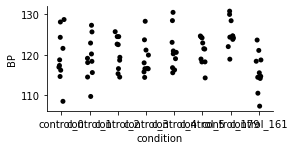

In [ ]:
sns.catplot(data=data_exp2,x='condition',y='BP',order=['control_0',
                                                       'control_1','control_2','control_3',
                                                       'control_4','control_5',#'control_6',
                                                       #'control_7','control_8','control_9','control_10',
                                                       'control_179','control_161',],
            color='black',#kind='box',
            aspect=2,height=2)

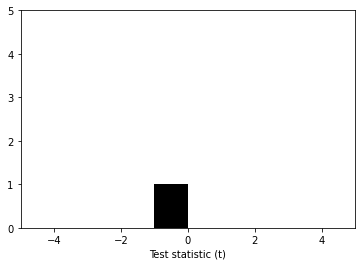

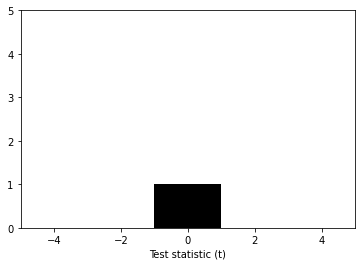

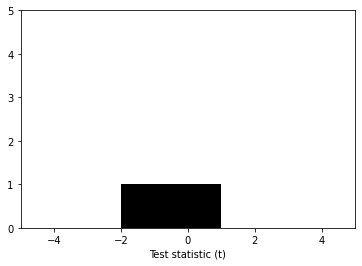

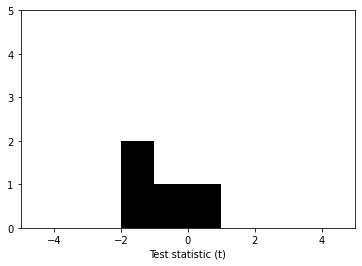

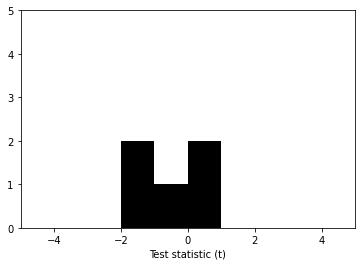

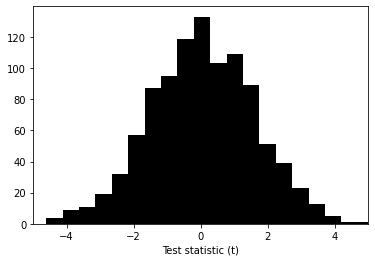

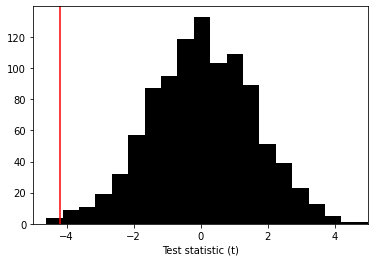

In [ ]:
x=5
plt.hist(np.array(null_test_stats[1:2]).flatten(),range(-4,4),color='black',)
plt.xlabel('Test statistic (t)')
plt.xlim(-x,x)
plt.ylim(0,5)
plt.show()
#plt.axvline(x=t_stat,color='red')

plt.hist(np.array(null_test_stats[1:3]).flatten(),range(-4,4),color='black',)
plt.xlabel('Test statistic (t)')
plt.xlim(-x,x)
plt.ylim(0,5)

plt.show()
#plt.axvline(x=t_stat,color='red')

plt.hist(np.array(null_test_stats[1:4]).flatten(),range(-4,4),color='black',)
plt.xlabel('Test statistic (t)')
plt.xlim(-x,x)
plt.ylim(0,5)

plt.show()
#plt.axvline(x=t_stat,color='red')

plt.hist(np.array(null_test_stats[1:5]).flatten(),range(-4,4),color='black',)
plt.xlabel('Test statistic (t)')
plt.xlim(-x,x)
plt.ylim(0,5)

plt.show()
#plt.axvline(x=t_stat,color='red')

plt.hist(np.array(null_test_stats[1:6]).flatten(),range(-4,4),color='black',)
plt.xlabel('Test statistic (t)')
plt.xlim(-x,x)
plt.ylim(0,5)

plt.show()
#plt.axvline(x=t_stat,color='red')

plt.hist(np.array(null_test_stats).flatten(),20,color='black',)
plt.xlabel('Test statistic (t)')
plt.xlim(-x,x)
#plt.ylim(0,5)
plt.show()

plt.hist(np.array(null_test_stats).flatten(),20,color='black',)
plt.xlabel('Test statistic (t)')
plt.xlim(-x,x)
#plt.ylim(0,5)
plt.axvline(x=test_stat,color='red')
plt.show()

In black we have the distribution of test statistics we obtained from the 1000 experiments measuring couch participants. In other words, this is the distribution of the test statistic under the null hypothesis.

The red line shows the test statistic from our comparison of exercise group vs with couch group.

**Is our difference in expression significant?**

if the null is true, in other words, if in reality there is no difference between couch and exercise, what is the probability of seeing such an extreme difference between their means (in other words, such an extreme test statistic)?

We can compute this from the plot above. We go to our null distribution, and count how many times we got a more extreme test statistic in our null experiment than the one we got for the couch vs exercise comparison.



In [ ]:
count_more_extreme=int(np.sum(np.abs(null_test_stats)>=np.abs(test_stat)))
print(count_more_extreme,'times we got a more extreme test statistic under the null')
print(count_more_extreme/1000,'fraction of the time we got a more extreme test statistic under the null')

4 times we got a more extreme test statistic under the null
0.004 fraction of the time we got a more extreme test statistic under the null


What we computed above is called a **p-value**. Now, this is a very often misunderstood term, so let's think about it deeply. 

Deeply.

Deeply.

About what it is, what it is not.

**P-values**
--

To remember what a p-value is, you decide to make a promise to me and more importantly yourself, that from now on, any sentence in which you mention a p-value will start with "if the null were true, ...".

**A p-value IS:**
- if the null were true, the probability of observing something as extreme or more extreme than your test statistic.
- it's the quantification of your "whoa!", given your null hypothesis. More "whoa!" = smaller p-value.

**A p-value is NOT:**
- the probability that the null hypothesis is wrong. We don't know the probability of that. That's sort of up to the universe. 
- the probability that the null hypothesis is wrong. This is so important, that it's worth putting it on the list twice.

Why is this distinction so important? 

First, because we can be very good at estimating what happens under the null. It's much more challenging to think about other scenarios. For instance, if you needed to make a model for the BP being different between 2 conditions, how different do you expect them to be? Is the average couch group at 120 and the exercise at 110? Or the couch at 125 and exercise at 130? Do you make a model for each option and grow old estimating all possible models?

Second, it's also a matter of being conservative. It's common courtesy to assume the 2 conditions are the same. I expect you to come to me and convince me that it would be REALLY unlikely to observe what we have just seen given the null, to make it worthwhile my time. It would be weird to just assume the BP is different between the 2 conditions and have to prove that they are the same. We'd be swimming in false positives.

**Statistical significance**

Now that we have a p-value, you need to ask yourself where you set a cutoff for something being unlikely enough to be "significant", or worth your attention. Usually, that's 0.05, or 0.01, or 0.1. Yes, essentially it's a somewhat arbitrary small number.

I reiterate: this does not mean that the exercise group is different from the couch group for sure. If you were to do the experiment 1000 times with groups of participants assigned to "couch", in a small subset of your experiments, you'll get a test statistic as or more extreme than the one we found in our experiment comparing. But given that it's unlikely to get this result under the null hypohesis, you call it a significant difference, one that makes you think.

In summary: 
- you look at your p-value - and you think about the probability of getting your result under the null, as you need to include these words in any sentence with p-values -
- compare it with your significance threshold 
- if it is less than that threshold, you call that difference in expression significant between KO and control.

**Technical note: one-tailed vs two-tailed tests**

*Depending on what you believe would be the possible alternative to your null hypothesis (conveniently called the alternative hypothesis), you may compute the p-value differently.*

*Specifically, in our example above, we computed the p-value by asking:*
- *if the null were true, what is the probability of obtaining a test statistic as extreme or more extreme than the one we've seen. That means we asked whether there were test statistics larger than our test statistic, or lower than minus our test statistic. This is called a two-tailed test, because we looked at both sides (both tails) of the distribution under the null.*

*If your alternative hypothesis were that the treatment specifically decreases baseline blood pressure, you'd compute the p-value differently, as you'd look under the null at only what fraction of the time you've seen a test statistic lower than the one we've seen. This is a one-tailed test.*

*Of course, this is not an invitation to use one-tailed tests to try to get more significant p-values, since by definition the p-values from a one-tailed test will be smaller than those for a two-tailed test. You should define your alternative hypothesis based on deep thought. I personally like to be as conservative as possible, and as such strongly prefer two-tailed tests.*









**Hypothesis testing in a nutshell**

- come up with a **null hypothesis**. 
  * In our case: the gene does not change in expression.
- collect some data
  * yay, we love data!
- define a **test statistic** to measure your quantity of interest. 
  * here we looked at the difference between means, but as we'll see below, there are more sophisticated ways to go about it.
- figure out the **distribution of the test statistic under the null** hypothesis
  * here, we did this by repeating the measurement on the same type of cells 1000 times. Next, we'll learn that under certain conditions we can comoute this distribution analytically, rather than having to do thousands of experiments.
- compute a **p-value**
  * that tells you if the null were true, the probability of getting your test statistic or something even more outrageous
- decide if **significant**
  * is p-value below a pre-defined threshold

If you deeply understand this, you're on a very good path to understand a LARGE fraction of all statistics you'll find in genomics.

**PART II. EXAMPLE HYPOTHESIS TESTING USING THE T-TEST**
---

Now, let's do a t-test.



In [ ]:
from scipy.stats import ttest_ind
t_stat,pvalue=ttest_ind(data[data['condition']=='exercise']['BP'],
    data[data['condition']=='couch']['BP'],
                        )
print(t_stat,pvalue)


-2.0696748164600636 0.053147776556375585


37 times we got a more extreme test statistic under the null
0.037 fraction of the time we got a more extreme test statistic under the null = p-value


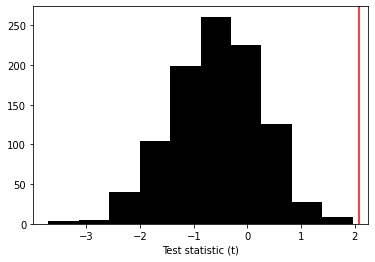

In [ ]:
#as before, compare to the distribution
null_test_stats=[]
for i in range(1000):
  current_t,current_pvalue=ttest_ind(data_exp2[data_exp2['condition']=='control_'+str(i)]['BP'],
      data_exp2[data_exp2['condition']=='control_0']['BP'],
                        )
  null_test_stats.append(current_t)

plt.hist(np.array(null_test_stats).flatten(),color='black')
plt.xlabel('Test statistic (t)')
plt.axvline(x=t_stat,color='red')

count_more_extreme=int(np.sum(np.abs(null_test_stats)>=np.abs(t_stat)))
print(count_more_extreme,'times we got a more extreme test statistic under the null')
print(count_more_extreme/1000,'fraction of the time we got a more extreme test statistic under the null = p-value')

Now, the exciting thing is that we didn't have to perform the second experiment to get an empirical distribution of the test statistic under the null. Rather, we were able to estimate it analytically. And indeed, the p-value we obtained from the t-test is similar to the one we got from our big experiment!


Ok, so by now, you should be pros at hypothesis tests.

Remember: decide on the null, compute test statistic, get the distribution of the test statistic under the null, compute a p-value, decide if significant.

There are of course many other types of hypothesis tests that don't look at the difference between groups as we did here. For instace, in GWAS, you want to see if a mutation is enriched in a disease cohort compared to healthy samples, and you do a chi-square test. 
Or maybe you have more than 2 conditions. Then you do ANOVA, rather than a t-test.


**PROJECT: EXAMPLE III:** 
===

RNA sequencing: which genes are characteristic for different types of immune cells in your body?
--

Motivation
--

Although all cells in our body have the same DNA, they can have wildly different functions. That is because they activate different genes, for example your brain cells turn on genes that lead to production of neurotransmitters while liver cells activate genes encoding enzymes.

Here, you will compare different types of immune cells (e.g. B-cells that make your antibodies, and T-cells which fight infections), and identify which genes are specifically active in each type of cell.

In [ ]:
#install scanpy
!pip install scanpy

RNA sequencing
--

RNA sequencing allows us to quantify the extent to which each gene is active in a sample. When a gene is active, its DNA is transcribed into mRNA and then translated into protein. With RNA sequencing, we are counting how frequent mRNAs for each gene occur in a sample. Genes that are more active will have higher counts, while genes that are not made into mRNA will have 0 counts.

Data
--

The code below will download the data for you, and organize it into a data frame, where:
- every row is a different gene
- every column is a different sample. 
  - We have 6 samples, 3 of T cells (called "CD4 T cells" and B cells ("B cells").
- every value is the number of reads from each gene in each sample. 
  - Note: the values have been normalized to be comparable between samples.

In [ ]:
import scanpy as sc
def prep_data():
  adata=sc.datasets.pbmc3k_processed()
  counts=pd.DataFrame(np.expm1(adata.raw.X.toarray()),
                      index=adata.raw.obs_names,
                      columns=adata.raw.var_names)
  
  #make 3 reps T-cells and 3 reps B-cells
  cells_per_bulk=100
  celltype='CD4 T cells'
  cells=adata.obs_names[adata.obs['louvain']==celltype]
  bulks=pd.DataFrame(columns=[celltype+'.rep1',celltype+'.rep2',celltype+'.rep3'],
                    index=adata.raw.var_names)

  for i in range(3):
    cells_here=cells[(i*100):((i+1)*100)]
    bulks[celltype+'.rep'+str(i+1)]=list(counts.loc[cells_here,:].sum(axis=0))
  bulk_t=bulks

  celltype='B cells'
  cells=adata.obs_names[adata.obs['louvain']==celltype]
  bulks=pd.DataFrame(columns=[celltype+'.rep1',celltype+'.rep2',celltype+'.rep3'],
                    index=adata.raw.var_names)

  for i in range(3):
    cells_here=cells[(i*100):((i+1)*100)]
    bulks[celltype+'.rep'+str(i+1)]=list(counts.loc[cells_here,:].sum(axis=0))

  bulks=pd.concat([bulk_t,bulks],axis=1)
  bulks=bulks.sort_values(by=bulks.columns[0],ascending=False)
  return(bulks)

data=prep_data()
print(data.head())


**Let's explore the dataset**

**(1 pt)** What are the names of the samples?



**(2 pts)** What is the highest recorded value? What is the lowest?



In [ ]:
#write code to answer the questions here

**Exploring the data**

One gene that is different between our 2 cell types is IL7R. 

**(1 pt)** Plot the distribution of the IL7R gene in the 2 conditions. Which cell type (CD4 T cells or B cells) has the higher level of this gene?



**(1 pt)** How many samples do we have for each condition?


In [ ]:
#inspect the data 
GENE='IL7R'
long_data=pd.DataFrame({GENE:data.loc[GENE,:],
                        'condition':[x.split('.')[0] for x in data.columns]})
print(long_data)

sns.catplot(data=long_data,x='condition',y=GENE)

**Two-sample t-test for one gene across 2 conditions**

We are now going to check whether the gene IL7R is differentially active in CD4 T cells vs B cells. 

**(1 pt)** What is the null hypothesis?

**(1 pt)** Based on your plot of the gene in the two conditions, and the fact that there looks like there might be a difference, what do you expect the sign of the t-statistic to be (CD4 T cells vs B cells)?


We are going to use the function ttest_ind to perform our t-test. You can read about it here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.



**(1 pt)** What is the t-statistic?


**(1 pt)** What is the p-value?


**(1 pt)** Describe in your own words what the p-value means.


**(1 pt)** Is the p-value significant at alpha = 0.05?


In [ ]:
#pick 1 gene, do 1 t-test
GENE='IL7R'
COND1=['CD4 T cells.rep'+str(x+1) for x in range(3)]
COND2=['B cells.rep'+str(x+1) for x in range(3)]

#plot gene across samples

#t-test
from scipy.stats import ttest_ind
t_stat,pvalue=ttest_ind(data.loc[GENE,COND1],data.loc[GENE,COND2])
print('t statistic',t_stat.round(2))
print('p-value',pvalue.round(5))

**Two-sample t-tests for each gene across 2 conditions**

We are now going to repeat our analysis from before for all genes in our dataset.

**(1 pt)** How many genes are present in our dataset?



In [ ]:
#all genes t-tests
PSEUDOCOUNT=1
results=pd.DataFrame(index=data.index,
                     columns=['t','p','lfc'])
for gene in data.index:
  t_stat,pvalue=ttest_ind(data.loc[gene,COND1],data.loc[gene,COND2])
  lfc=np.log2((data.loc[gene,COND1].mean()+PSEUDOCOUNT)/(data.loc[gene,COND2].mean()+PSEUDOCOUNT))
  results.loc[gene,'t']=t_stat
  results.loc[gene,'p']=pvalue
  results.loc[gene,'lfc']=lfc


**Ranking discoveries by either significance or fold change**

For each gene, we have obtained:
- a t-statistic
- a p-value for the difference between the 2 conditions
- a log2 fold change between CD4 T cells and B cells

We can inspect how fold changes relate to the significance of the differences. 

**(1 pt)** What do you expect the relationship to be between significance/p-values and fold changes?


 


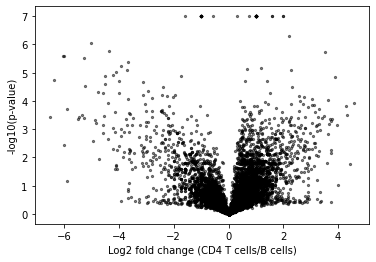

In [ ]:
#volcano plot
###### 
results['p']=results['p'].fillna(1)

PS2=1e-7
plt.scatter(results['lfc'],-np.log10(results['p']+PS2),s=5,alpha=0.5,color='black')
plt.xlabel('Log2 fold change (CD4 T cells/B cells)')
plt.ylabel('-log10(p-value)')
plt.show()

**Multiple testing correction**

Now, we will explore how the number of differentially active genes differs depending on how we correct for multiple tests.

**(1 pt)** How many genes pass the significance level of 0.05, without performing any correction for multiple testing?



In [ ]:
ALPHA=0.05
print((results['p']<=ALPHA).sum())

We will use a function that adjusts our p-values using different methods, called "multipletests". You can read about it here: https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html

We will use the following settings:
- for Bonferroni correction, we set method='bonferroni'. This will multiply our p-values by the number of tests we did. If the resulting values are greated than 1 they will be clipped to 1.
- for Benjamini-Hochberg correction, we set method='fdr_bh'

**(2 pts)** How many genes pass the significance level of 0.05, after correcting for multiple testing using the Bonferroni method? What is the revised p-value threshold?

**(1 pt)** Would the gene we tested before, IL7R, pass this threshold?



In [ ]:
#multiple testing correction 

#bonferroni
from statsmodels.stats.multitest import multipletests
results['p.adj.bonferroni']=multipletests(results['p'], method='bonferroni')[1]

FDR=ALPHA
plt.hist(results['p'],100)
plt.axvline(x=FDR,color='red',linestyle='--')
plt.xlabel('Unadjusted p-values')
plt.ylabel('Number of genes')
plt.show()
plt.hist(results['p.adj.bonferroni'],100)
#plt.ylim(0,200)
plt.axvline(x=FDR,color='red',linestyle='--')
plt.xlabel('P-values (Bonferroni corrected)')
plt.ylabel('Number of genes')
plt.show()
plt.show()

print('DE Bonferroni',(results['p.adj.bonferroni']<=FDR).sum())

**(1 pt)** How many genes pass the significance level of 0.05, after correcting for multiple testing using the Benjamini-Hochberg method? 



In [ ]:
results['p.adj.bh']=multipletests(results['p'], method='fdr_bh')[1]

FDR=0.05
plt.hist(results['p'],100)
plt.axvline(x=FDR,color='red',linestyle='--')
plt.xlabel('Unadjusted p-values')
plt.ylabel('Number of genes')
plt.show()
plt.hist(results['p.adj.bh'],100)
plt.ylim(0,2000)
plt.axvline(x=FDR,color='red',linestyle='--')
plt.xlabel('P-values (Benjamini-Hochberg corrected)')
plt.ylabel('Number of genes')
plt.show()

print('DE BH',(results['p.adj.bh']<=FDR).sum())

**(1 pt)** Which multiple testing correction is the most stringent? 


Finally, let's look at our results. Print the significant differential genes and look up a few on the internet.

In [ ]:
results.loc[results['p.adj.bonferroni']<=FDR,:].sort_values(by='lfc')

For example, CD7 is a gene found on T cells, whereas HLA genes are found on B cells.